# OPS808 Final Project - Fruit 360
## Classification of Various Fruits Using Machine Learning Models
#### Edith Cabrera | Alex Choy | Dhyan Gandhi | Melanie Parazo | Amber Yao
#### June 25, 2019

In [17]:
# importing libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import keras
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.image import load_img, img_to_array
from sklearn import datasets, metrics, preprocessing
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set() 
import pickle
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import Sequential, losses, layers, optimizers, activations
from keras.models import load_model

# Pre-processing Steps
The loaddata function below was created to load in the fruit images for classification. It obtains the image file paths, numerical targets, and the corresponding categorical targets. The image file path is used to load the image and convert it into an array of pixels. The converted image arrays are added to a list before they are returned by the function in a digestable format. The image arrays are normalized by dividing each one by the maximum value in each array. This makes our data easier to process and also allows the image to be shown in true color, instead of as a negative image.

In [4]:
def loaddata(path):
    data = sklearn.datasets.load_files(path, random_state=0)
    data_files = data['filenames']
    data_target = data['target']
    data_targetnames = data['target_names']
    data_array = []
    for file in data_files:
        # load the image
        img = load_img(file)
        # convert to numpy array
        img_array = img_to_array(img)
        data_array.append(img_array) # append array to list
    data_array = np.array(data_array) # make list into an array so easier to use
    data_array = data_array/data_array.max() # normalize the training and test dataset
    return data_array, data_target, data_targetnames

In [5]:
# load the training images
x_train, y_train, train_names = loaddata('/content/datalab/datalab/Training')

In [6]:
# load the testing images
x_test, y_test, test_names = loaddata('/content/datalab/datalab/Test')

### Plot 25 images to explore the data

Text(0.5,1,'This image is a Tomato 2')

Text(0.5,1,'This image is a Apple Golden 1')

Text(0.5,1,'This image is a Banana')

Text(0.5,1,'This image is a Plum 3')

Text(0.5,1,'This image is a Lemon Meyer')

Text(0.5,1,'This image is a Plum 2')

Text(0.5,1,'This image is a Carambula')

Text(0.5,1,'This image is a Apple Braeburn')

Text(0.5,1,'This image is a Salak')

Text(0.5,1,'This image is a Tomato 1')

Text(0.5,1,'This image is a Apple Red Yellow 1')

Text(0.5,1,'This image is a Mandarine')

Text(0.5,1,'This image is a Banana')

Text(0.5,1,'This image is a Strawberry Wedge')

Text(0.5,1,'This image is a Apple Golden 3')

Text(0.5,1,'This image is a Pear Red')

Text(0.5,1,'This image is a Lemon')

Text(0.5,1,'This image is a Lychee')

Text(0.5,1,'This image is a Tomato 3')

Text(0.5,1,'This image is a Cherry Wax Yellow')

Text(0.5,1,'This image is a Lemon Meyer')

Text(0.5,1,'This image is a Tamarillo')

Text(0.5,1,'This image is a Tomato 3')

Text(0.5,1,'This image is a Mulberry')

Text(0.5,1,'This image is a Strawberry')

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


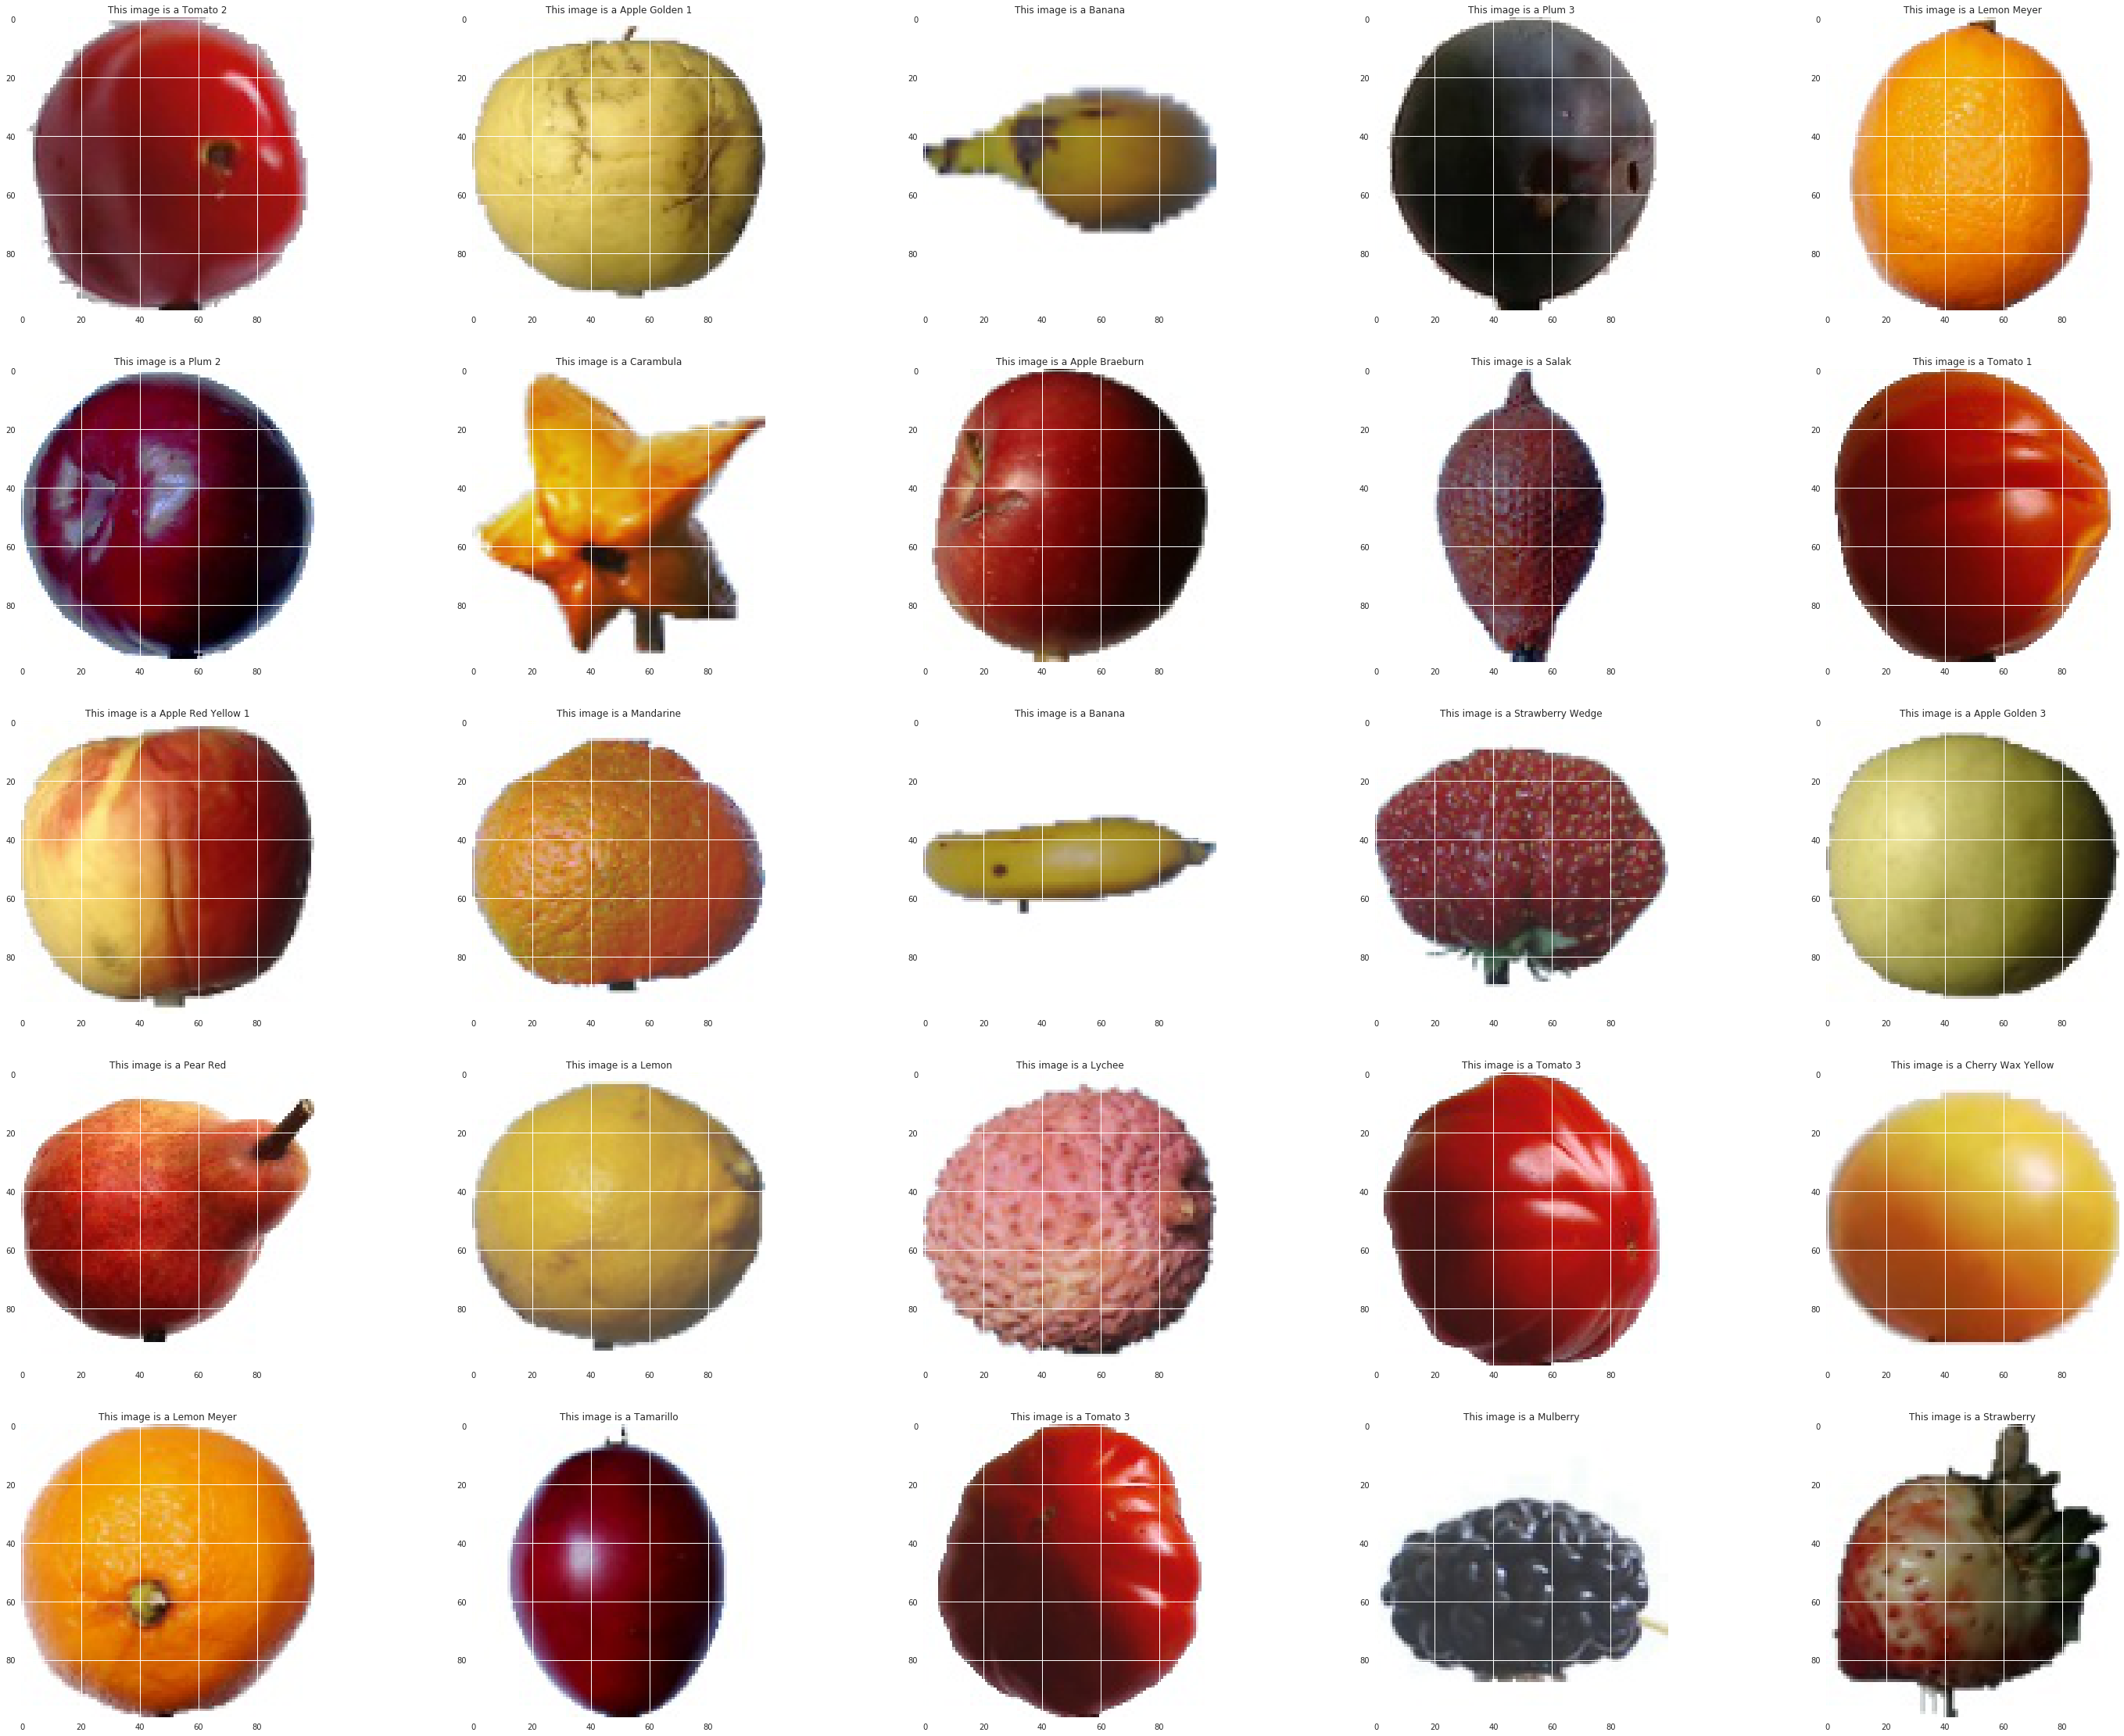

In [8]:
# generate 20 random integers for the plots
rand = np.random.randint(low=0, high=len(x_train)-1, size=25).tolist()
plt.figure(figsize=(50,40))

# loop to iterate through the list and plot images
for i in rand:
    plt.subplot(5,5, rand.index(i)+1)
    plt.imshow(x_train[i])
    plt.title('This image is a {}'.format(train_names[y_train[i]]))
    
# double click image plots to enlarge

Just a little bit more processing...

In [9]:
x_train_reshaped = x_train.reshape((x_train.shape[0], -1))
x_test_reshaped = x_test.reshape((x_test.shape[0], -1))

Ready for machine learning!

# Logistic Regression Model
Below is the code used for Logisitc Regression Model. We saved it in a pickle file (code also below) and loaded this pickle (code below) to run the results of the model.

In [ ]:
# build and fit the logistic regression model
# n_jobs used to parallelize, -1 for the max, verbose to see that it was iterating through
model = LogisticRegression(solver='sag', verbose=10, n_jobs=-1) 
model.fit(x_train_reshaped, y_train)

In [ ]:
# save the logistic regression model to a pickle file
pickle.dump(model, open('logreg1_model.sav', 'wb'))

In [11]:
# load the model saved in the step directly above
loaded_model_lr = pickle.load(open('logreg1_model.sav', 'rb'))

# predictions for logistic regression model for training and test data
predslr_train = loaded_model_lr.predict(x_train_reshaped) 
predslr_test = loaded_model_lr.predict(x_test_reshaped)

# accuracy score for logistic regression
metrics.accuracy_score(predslr_train, y_train)
metrics.accuracy_score(predslr_test, y_test)

0.9999623897549692

0.9064724012328383

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


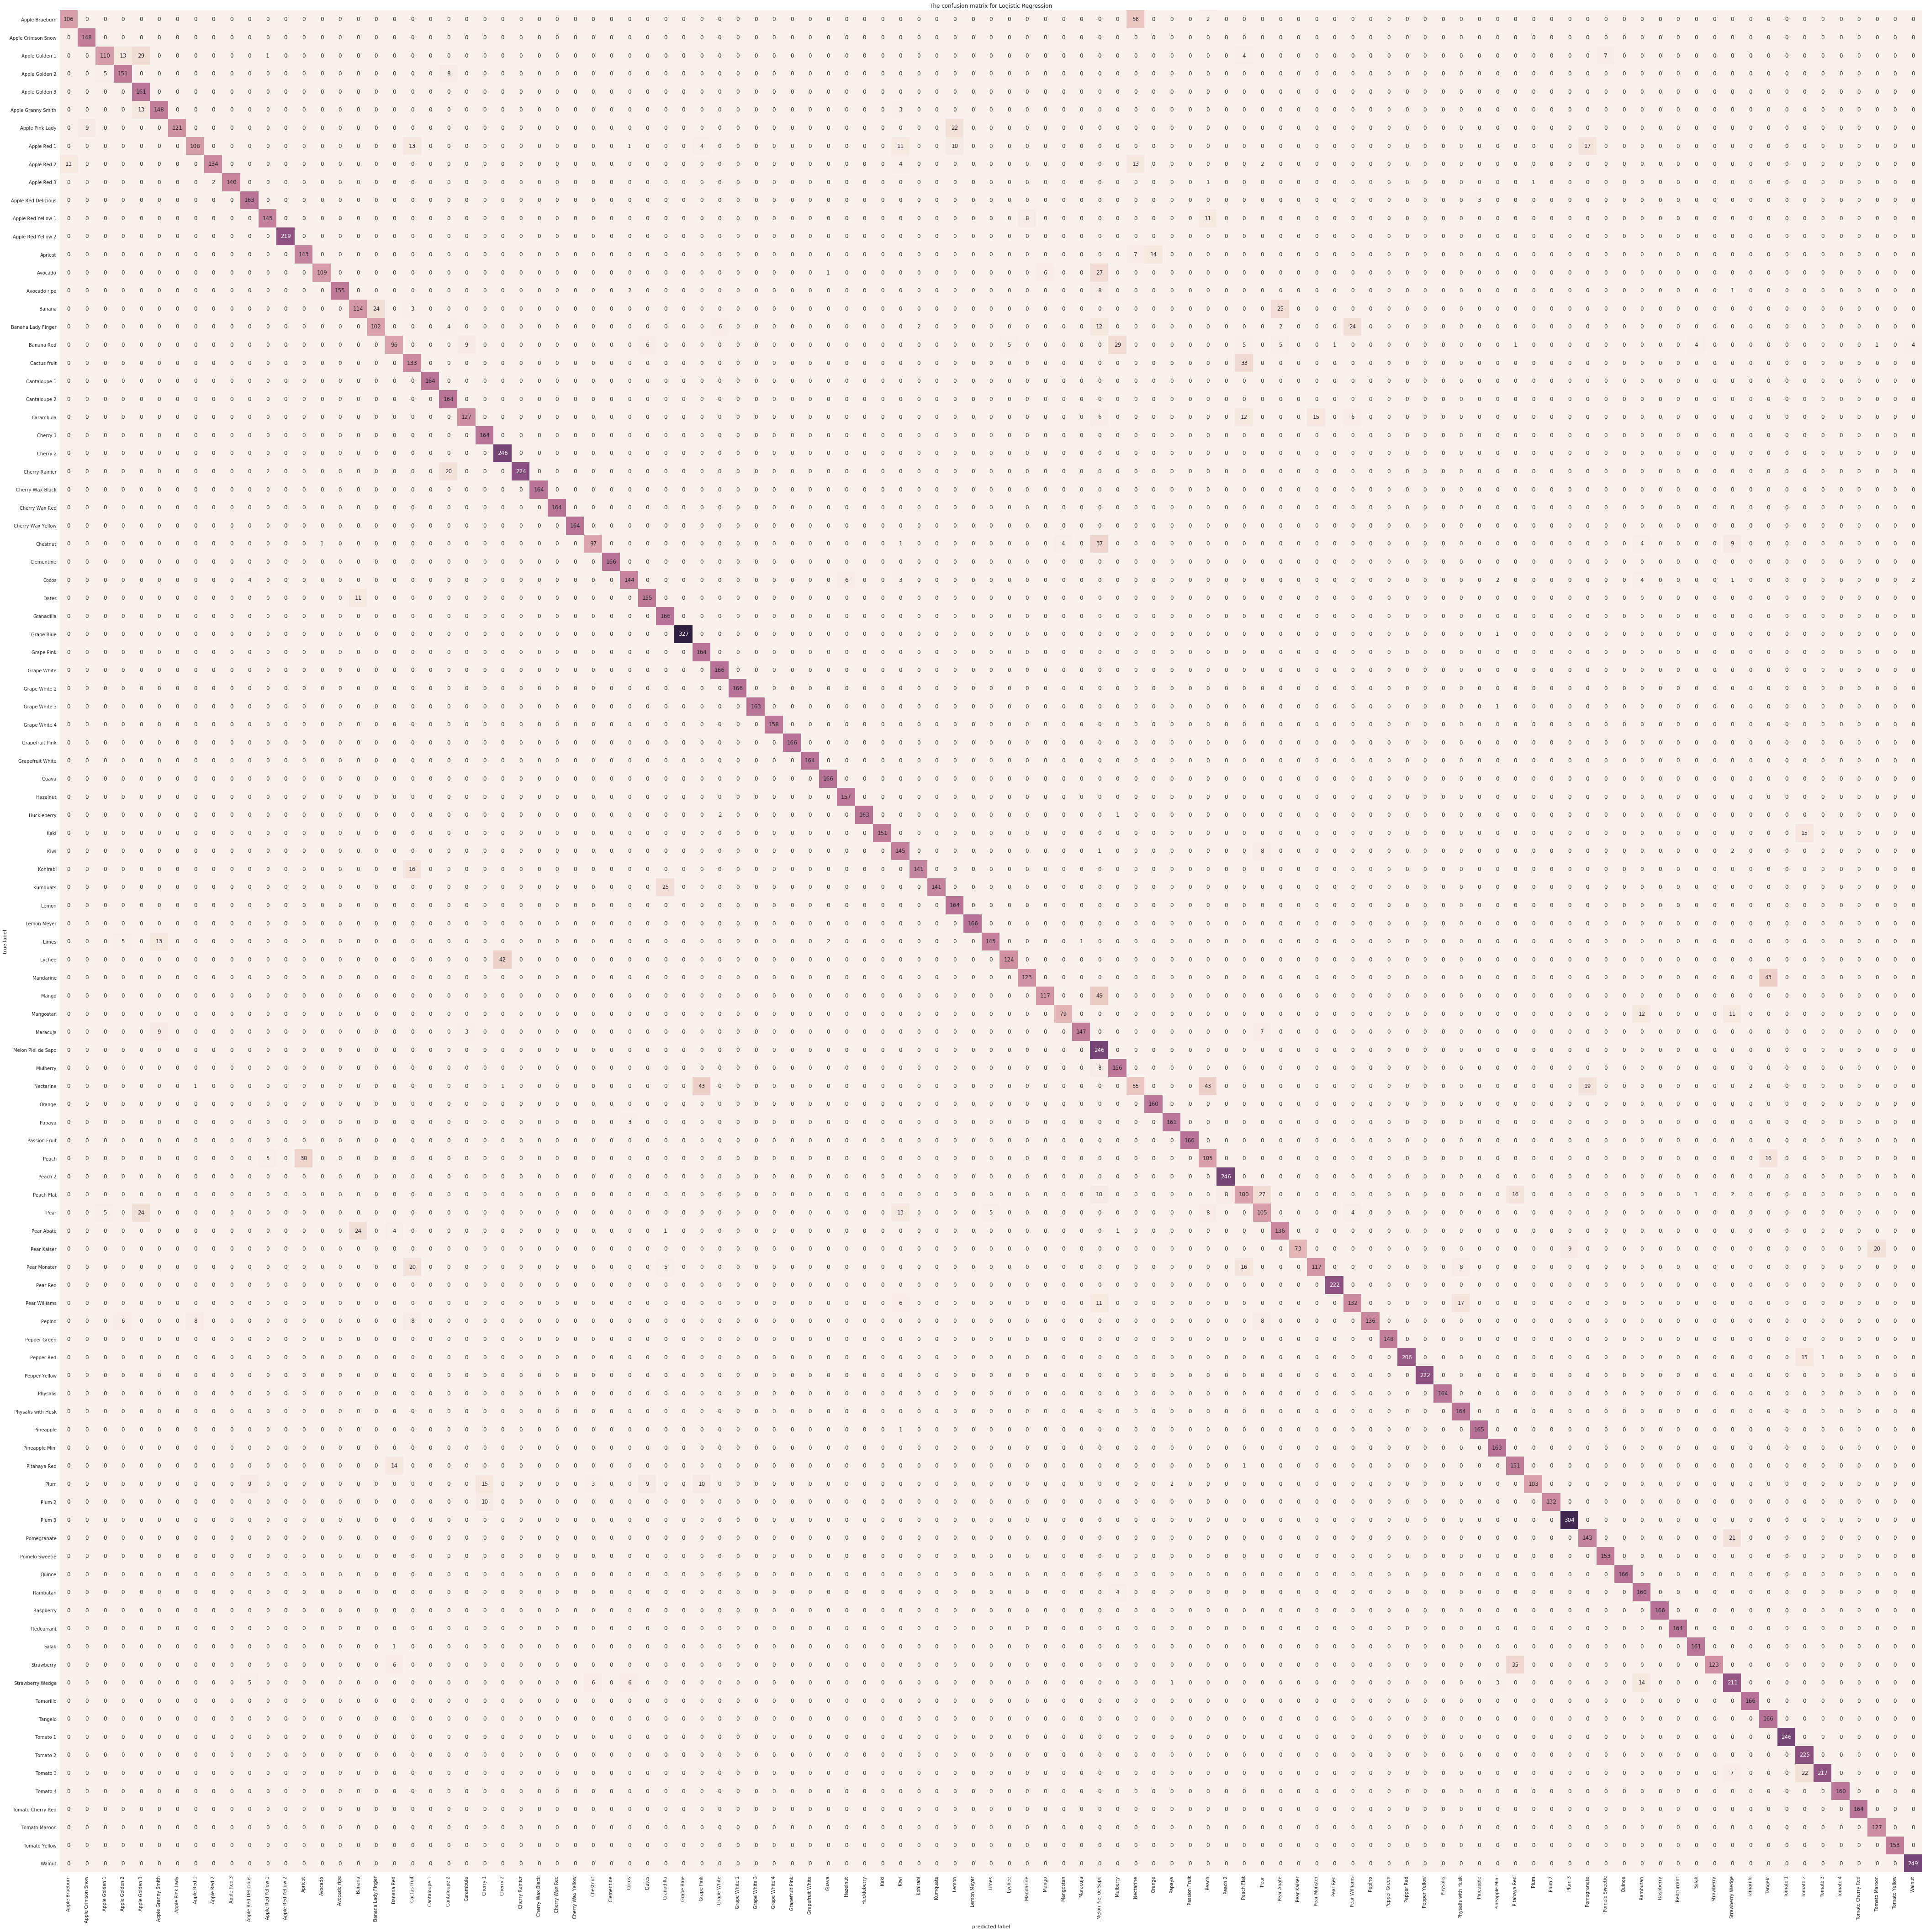

In [12]:
cm_lr=metrics.confusion_matrix(y_test, predslr_test) # confusion matrix for training
# nice format for confusion matrix
plt.figure(figsize=(75,75))
sns.heatmap(cm_lr, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=test_names,
           yticklabels=test_names)
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.title('The confusion matrix for Logistic Regression');

# Deep Neural Network
Below is the code used for a Neural Network Model. We saved it in an H5 file and loaded this H5 to run the results of the model.

In [14]:
# build the one hot encoder
enc = preprocessing.OneHotEncoder()

# fit the one hot encoder
enc.fit(np.expand_dims(y_train,axis=1))

# transform the targets for keras to process
onehotlabels_train = enc.transform(np.expand_dims(y_train,axis=1)).toarray()
onehotlabels_test = enc.transform(np.expand_dims(y_test,axis=1)).toarray()

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [ ]:
# create a deep neural network to predict the image classes
dnn_orig = models.Sequential()

# we will have 3 hidden layers, in addition to our input and output layers.
dnn_orig.add(layers.Dense(100, activation='relu', input_dim=x_train_reshaped.shape[1]))
dnn_orig.add(layers.Dense(100, activation='relu'))
dnn_orig.add(layers.Dense(100, activation='relu'))
dnn_orig.add(layers.Dense(103, activation='softmax'))

dnn_orig.compile(optimizer = keras.optimizers.Nadam(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_dnn_orig = dnn_orig.fit(x_train_reshaped, onehotlabels_train, epochs = 100, batch_size = 5000, 
                                validation_data = (x_test_reshaped, onehotlabels_test))

Because we are loading our previously run model, we can't plot the curves below. However, this is the code we would use to plot the model accuracy and loss for training and testing sets for all of our neural networks.

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_dnn_orig.history['acc'])
plt.plot(history_dnn_orig.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_dnn_orig.history['loss'])
plt.plot(history_dnn_orig.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

In [ ]:
# creates a HDF5 file 'dnn_orig_fruit.h5'
dnn_orig.save('dnn_orig_fruit.h5')  

In [20]:
# returns a compiled model, identical to the one previously saved above
dnn_orig_reloaded = load_model('dnn_orig_fruit.h5')

# predict for train and test
dnn_orig_train_pred = dnn_orig_reloaded.predict_classes(x_train_reshaped)
dnn_orig_test_pred = dnn_orig_reloaded.predict_classes(x_test_reshaped)

# accuracy score for the previously run original dnn model
metrics.accuracy_score(y_train, dnn_orig_train_pred)
metrics.accuracy_score(y_test, dnn_orig_test_pred)

0.9899768696993061

0.9128607453068086

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


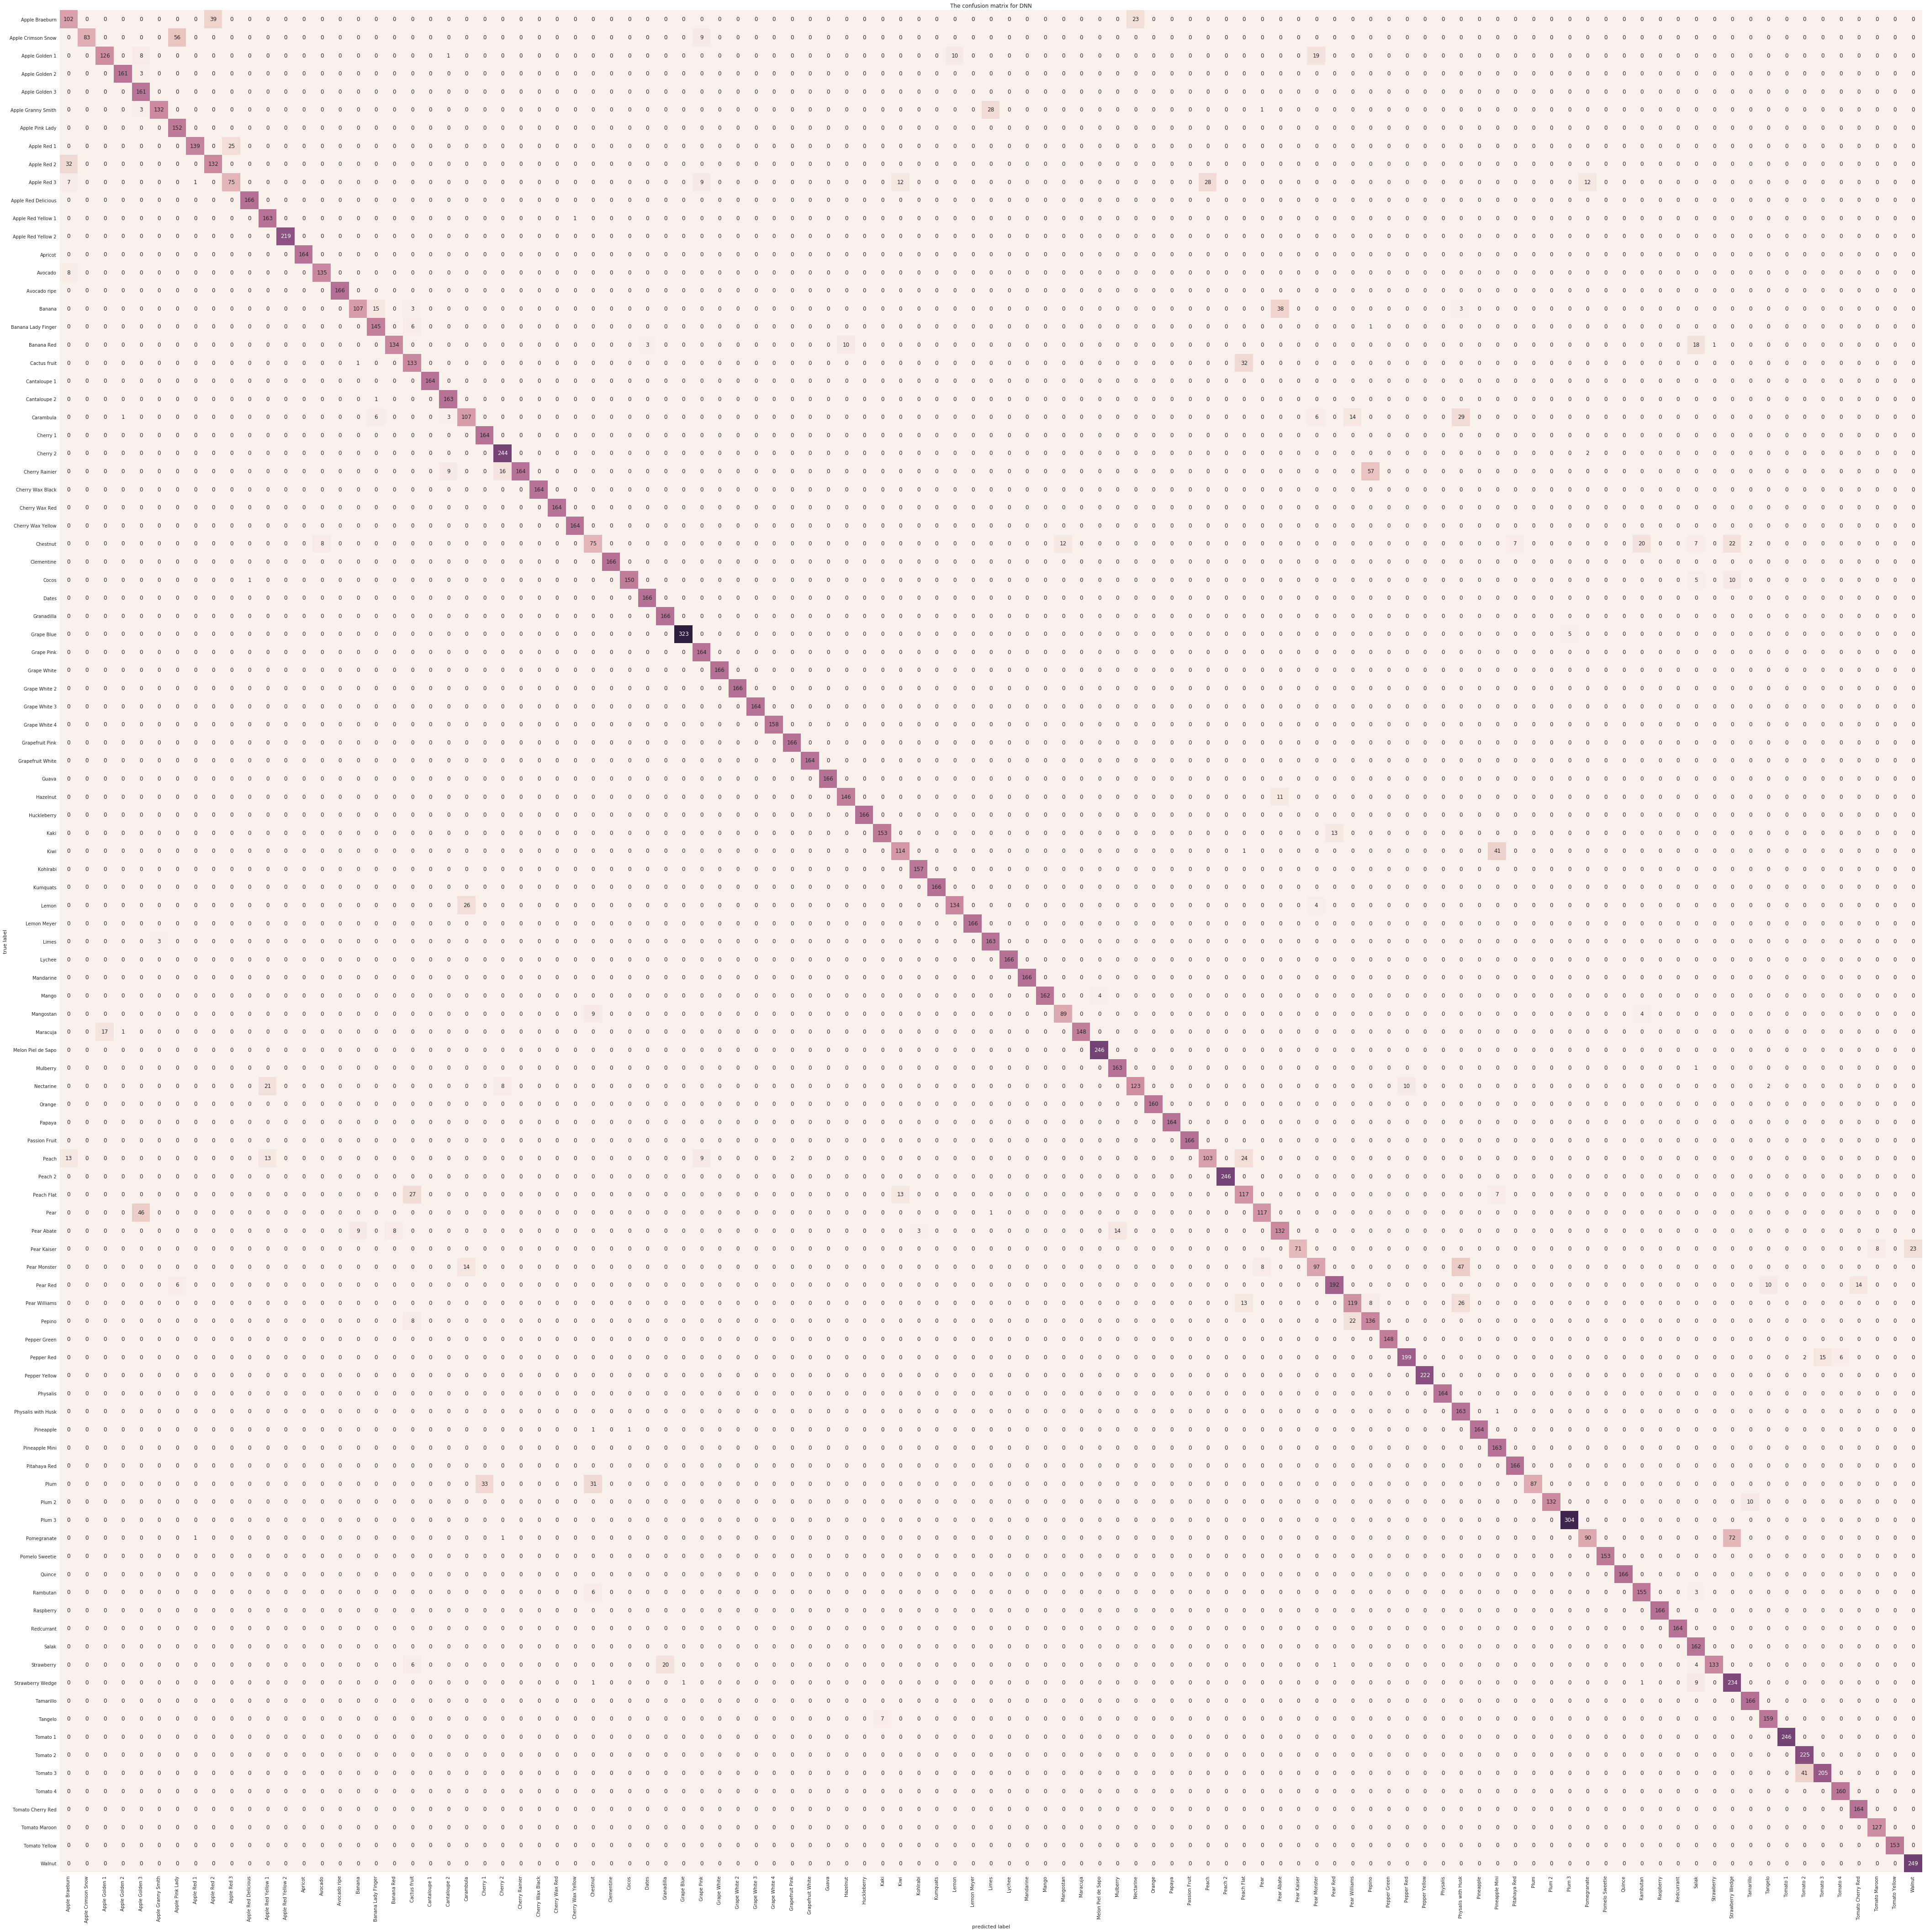

In [21]:
cm_dnn_orig=metrics.confusion_matrix(y_test, dnn_orig_test_pred) # confusion matrix for training
# nice format for confusion matrix
plt.figure(figsize=(75,75))
sns.heatmap(cm_dnn_orig, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=test_names,
           yticklabels=test_names)
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.title('The confusion matrix for DNN');

### Let's try to improve our Neural Network!

In [ ]:
# create a deep neural network better than the previous one
dnn = models.Sequential()

# we will have 3 hidden layers, in addition to our input and output layers.
dnn.add(layers.Dense(200, activation = 'relu', input_dim = x_train_reshaped.shape[1]))
dnn.add(layers.Dense(200, activation = 'relu'))
dnn.add(layers.Dense(200, activation = 'relu'))
dnn.add(layers.Dense(103, activation = 'softmax'))

dnn.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history_dnn = dnn.fit(x_train_reshaped, onehotlabels_train, epochs = 50, batch_size = 5000, 
                      validation_data = (x_test_reshape, onehotlabels_test))

In [ ]:
# creates a HDF5 file 'dnn_fruit.h5'
dnn.save('dnn_fruit.h5')  

In [24]:
# load model and predict
dnn_reloaded = load_model('dnn_fruit.h5')

# predict with train and test data
dnn_train_pred = dnn_reloaded.predict_classes(x_train_reshaped)
dnn_test_pred = dnn_reloaded.predict_classes(x_test_reshaped)

# accuracy score for the previously run dnn model
metrics.accuracy_score(y_train, dnn_train_pred)
metrics.accuracy_score(y_test, dnn_test_pred)

0.999849559019877

0.9508545811151583

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


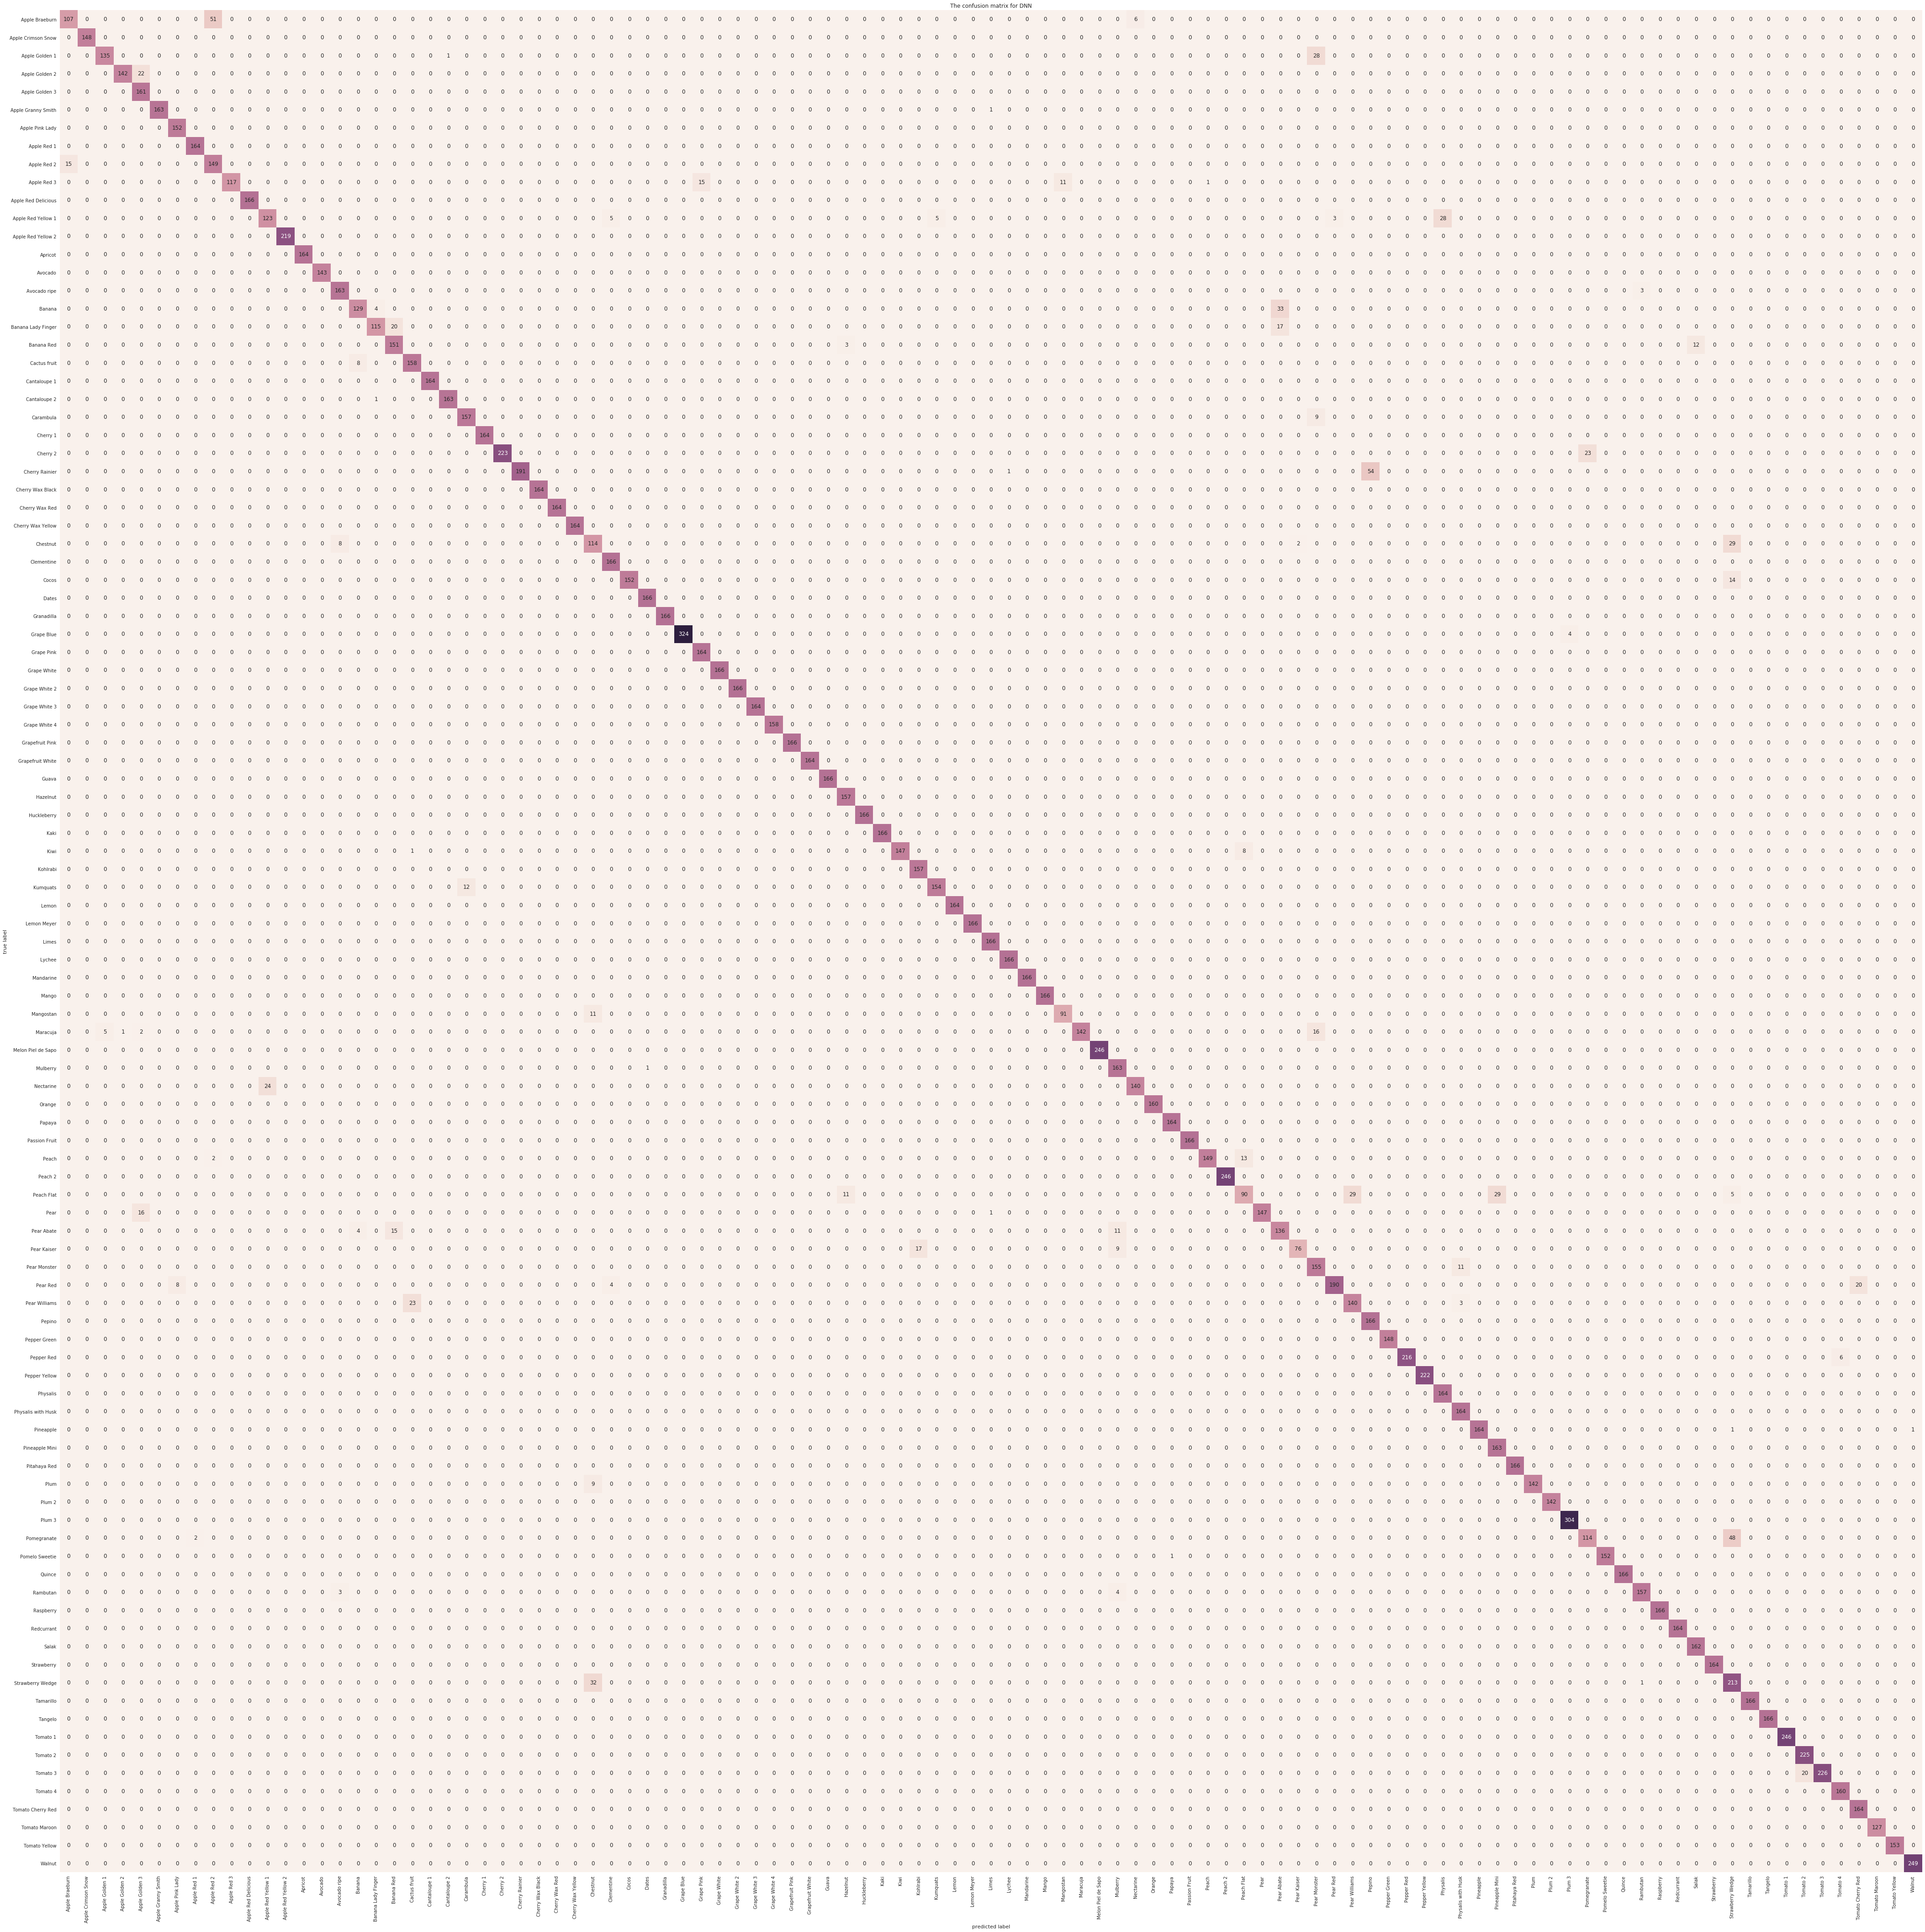

In [25]:
cm_dnn=metrics.confusion_matrix(y_test, dnn_test_pred) # confusion matrix for training
# nice format for confusion matrix
plt.figure(figsize=(75,75))
sns.heatmap(cm_dnn, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=test_names,
           yticklabels=test_names)
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.title('The confusion matrix for DNN');

# Convolutional Neural Network
Below is the code used for a Convolutional Neural Network. We saved it in a pickle file and loaded this pickle file to run the results of the model.

In [ ]:
# create a convolution neural network to predict image classes
model_cnn = Sequential()

# process image by comparing sub-images to filters
model_cnn.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=x_train.shape[1:]))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_cnn.add(Conv2D(64, (5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())

# add neurons to the model, less than typical deep neural network because learning has occured above
model_cnn.add(Dense(1000, activation='relu'))
model_cnn.add(Dense(103, activation='softmax'))
model_cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history=model_cnn.fit(x_train, onehotlabels_train, batch_size=5000, epochs=10,
          validation_data=(x_test, onehotlabels_test))

In [ ]:
pickle.dump(model_cnn, open('cnn_model.sav', 'wb'))

In [28]:
loaded_model_cnn = pickle.load(open('cnn_model.sav', 'rb'))

# predict with train and test data
cnn_train_pred = loaded_model_cnn.predict_classes(x_train) 
cnn_test_pred = loaded_model_cnn.predict_classes(x_test)

# accuracy score for the previously run cnn model 
metrics.accuracy_score(y_train, cnn_train_pred)
metrics.accuracy_score(y_test, cnn_test_pred)

1.0

0.9733818996917905

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


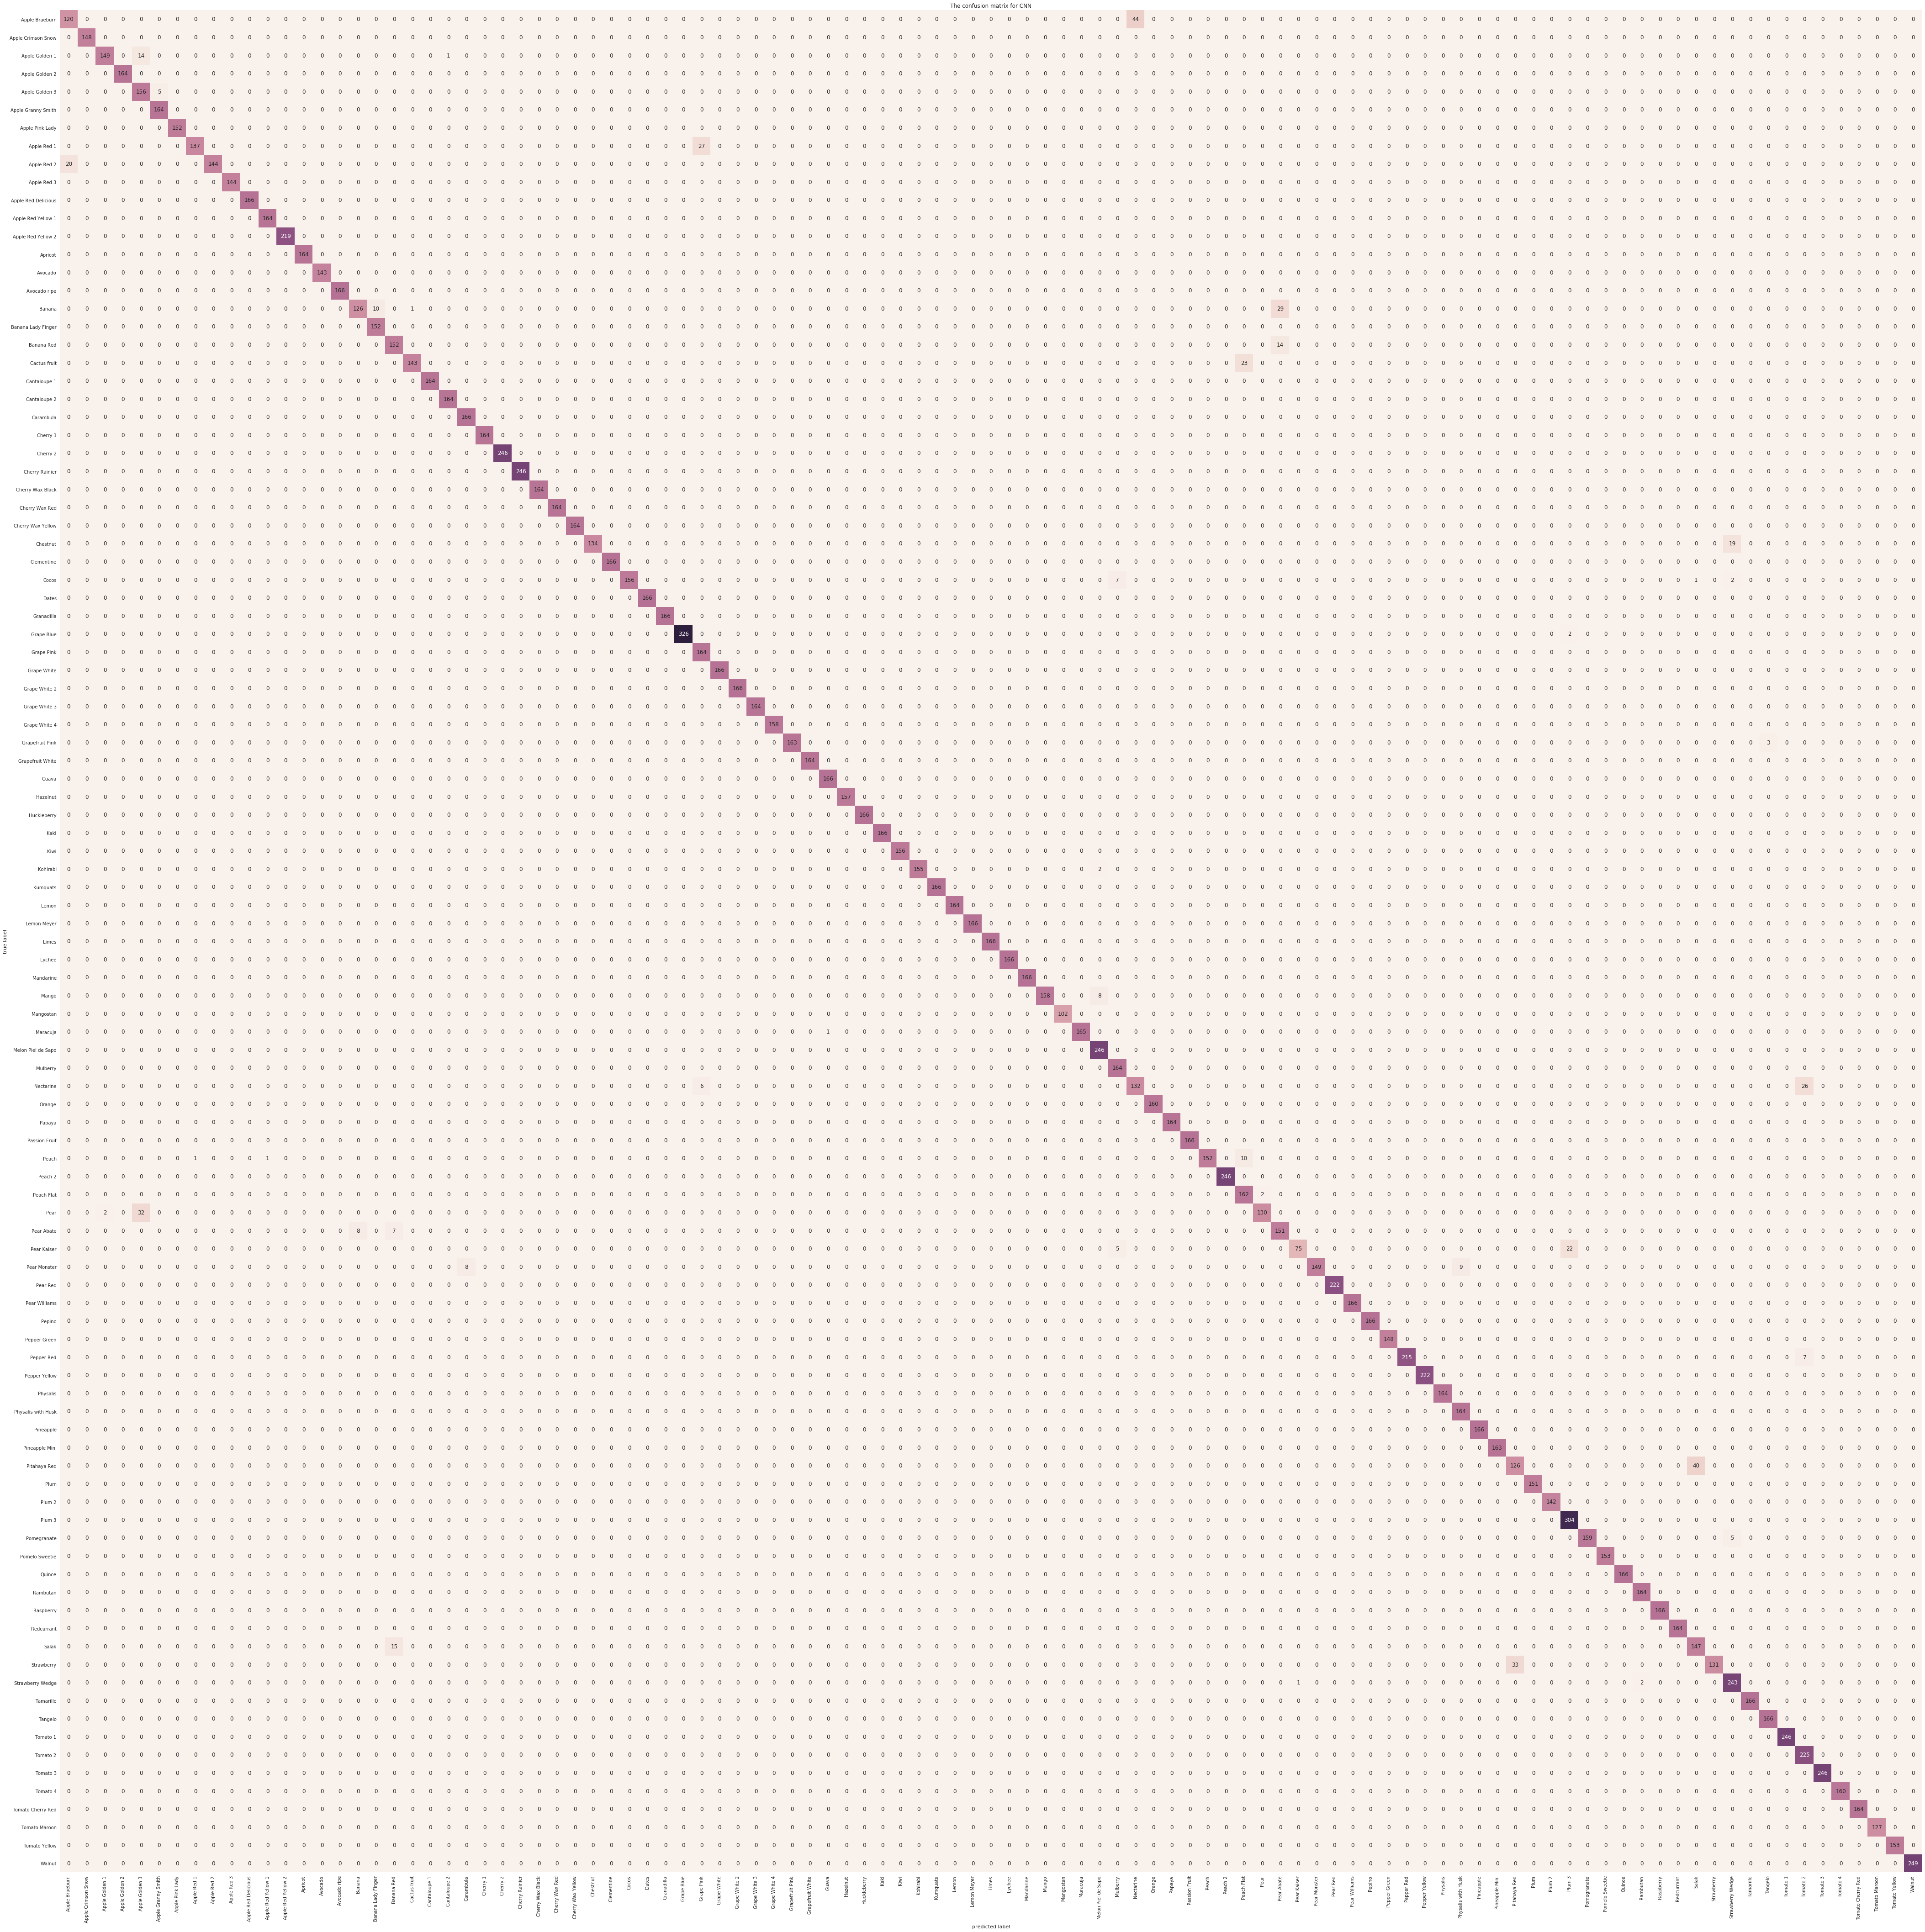

In [29]:
cm_cnn=metrics.confusion_matrix(y_test, cnn_test_pred) # confusion matrix for training
# nice format for confusion matrix
plt.figure(figsize=(75,75))
sns.heatmap(cm_cnn, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=test_names,
           yticklabels=test_names)
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.title('The confusion matrix for CNN');

# Random Forest Classifier
Below is the code used for a Random Forest Model. We didn't feel the need to save this model as it runs very quickly on the cloud.

In [32]:
# build and fit the random forest classifier
rfc_model = RandomForestClassifier(n_estimators = 125, n_jobs = -1, max_depth = 16, verbose = True, random_state = 0)
rfc_model.fit(x_train_reshaped, y_train)

[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   48.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=125, n_jobs=-1,
            oob_score=False, random_state=0, verbose=True,
            warm_start=False)

In [33]:
# save the random forest into a pickle file
pickle.dump(rfc_model, open('rfc_model.sav', 'wb'))

In [35]:
# load the model that was saved in the previous step
rfc_reloaded = pickle.load(open('rfc_model.sav', 'rb'))

# predict with train and test data
rfc_train_pred = rfc_reloaded.predict(x_train_reshaped)
rfc_test_pred = rfc_reloaded.predict(x_test_reshaped)


[Parallel(n_jobs=32)]: Done 125 out of 125 | elapsed:    1.9s finished
[Parallel(n_jobs=32)]: Done 125 out of 125 | elapsed:    0.6s finished


In [37]:
# accuracy score for the previously run cnn model 
metrics.accuracy_score(y_train, rfc_train_pred)
metrics.accuracy_score(y_test, rfc_test_pred)

0.9989469131391391

0.9544970579994396

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


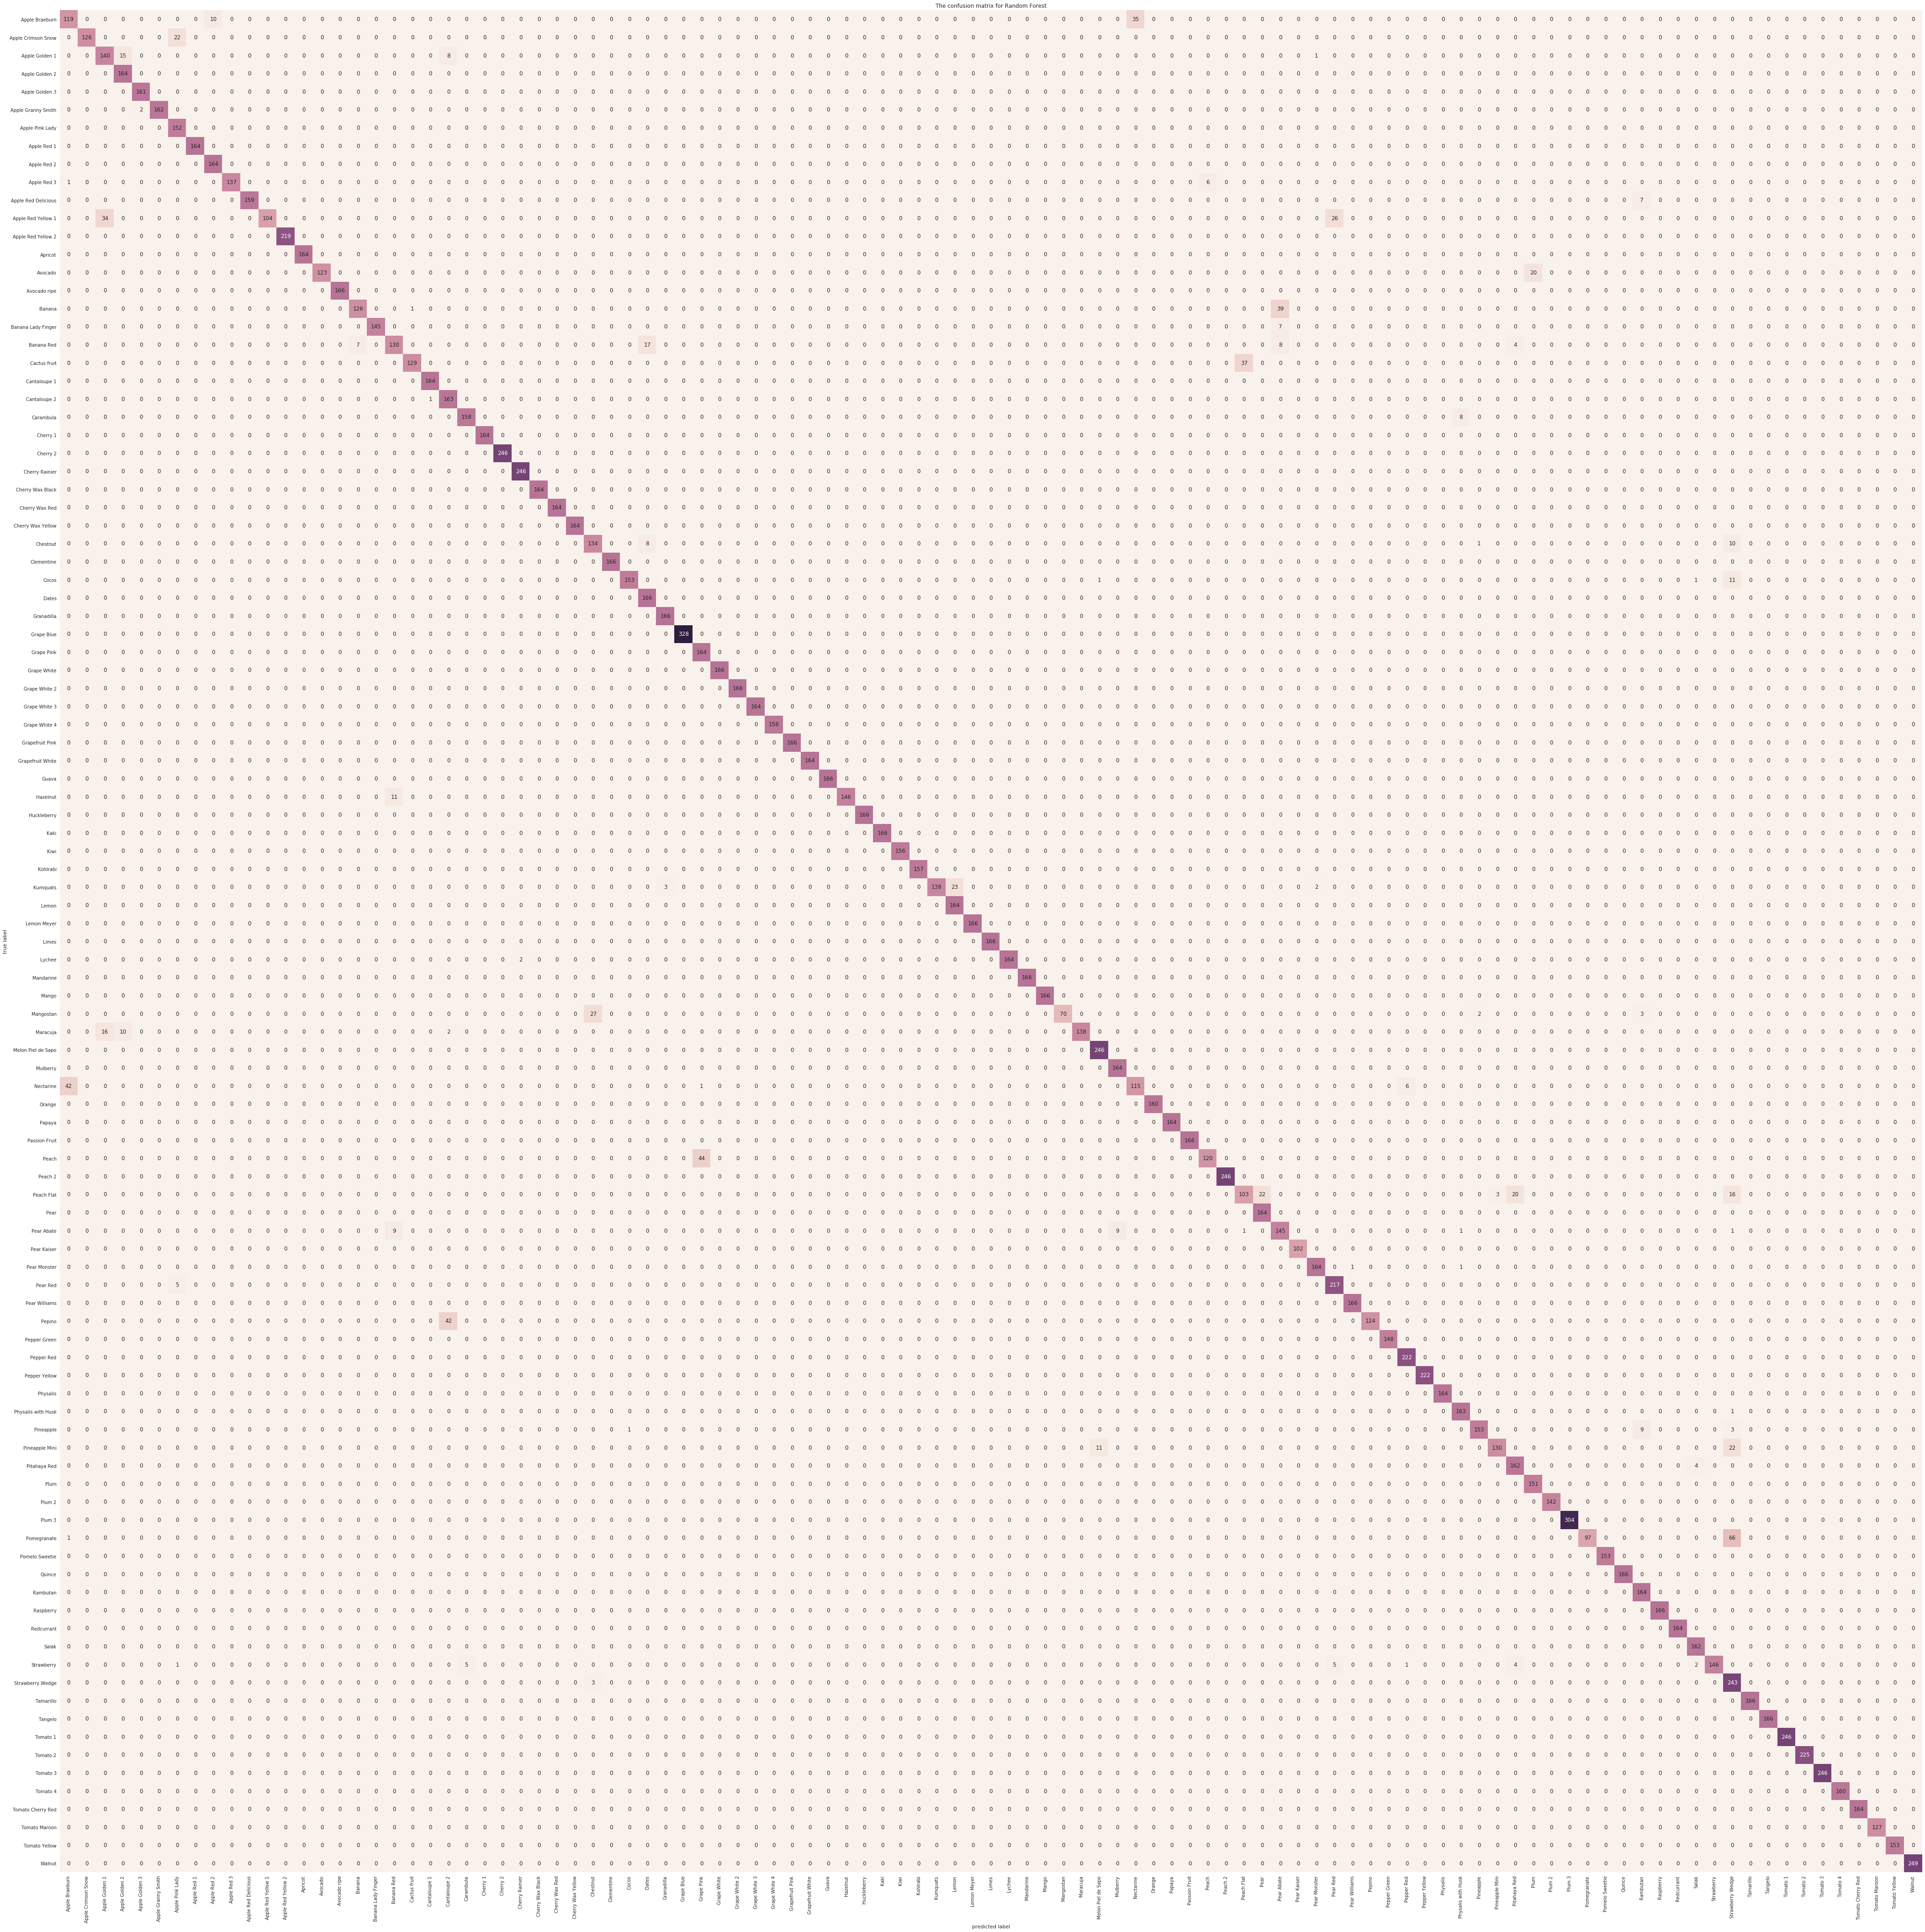

In [36]:
cm_rfc=metrics.confusion_matrix(y_test, rfc_test_pred) # confusion matrix for training
# nice format for confusion matrix
plt.figure(figsize=(75,75))
sns.heatmap(cm_rfc, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=test_names,
           yticklabels=test_names)
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.title('The confusion matrix for Random Forest');

# Honorable Mentions - Other Models We Tried
We attempted to run the KMeans and DBScan clustering algorithms, however they took an extremely long time to run on Google Cloud despite having increased our CPU quota. Given more time we would like to see these model run to completion.

In [ ]:
# see if you can group observations together by class (103 classes)
kmeans_model = KMeans(n_clusters = 103, random_state = 0, n_jobs = -1).fit(x_train)
kmeans_pred = kmeans_model.predict(x_test)

# check clustering scores
metrics.homogeneity_score(labels_true = y_test, labels_pred = kmeans_pred)
metrics.completeness_score(labels_true = y_test, labels_pred = kmeans_pred)

In [ ]:
# determine if its possible to cluster this data effectively
dbscan = DBSCAN(eps = 0.5, min_samples = 50, n_jobs = -1).fit(x_train)
db_pred = dbscan.predict(x_test)

# check clustering scores
metrics.homogeneity_score(labels_true = y_test, labels_pred = db_pred)
metrics.completeness_score(labels_true = y_test, labels_pred = db_pred)